In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [236]:
ROOT = "/home/charlie/Documents/Uni/Exeter - Data Science/Dissertation/"
RAW_DATA_DIR = os.path.join(ROOT, "rawData")

In [237]:
all_strandings = os.path.join(RAW_DATA_DIR, "all_strandings.csv")
df_raw = pd.read_csv(all_strandings)

In [238]:
df_raw.head()

,Cornwall ID,Species,LatinName,Number,Date,Year,ID Certainty,Sex,Length,LengthText,Location,GridRef,PMNo,Cause of Death (determined at PME),COD Category (PME),ConditionNotes,ByCatchEvidence,AnyNotes,BEEP Conclusion,Photos received
0,C/1993/023,Common Dolphin,Delphinus delphis,1.0,20/04/1993,1993,Definite,NaN,-9.00,NaN,"West of Gillan, Helford River complex",SW72,NaN,NaN,NaN,Decayed,NaN,"Head removed by Dr Reid , with intention of ta...",NaN,False
1,C/1993/008,Common Dolphin,Delphinus delphis,1.0,17/02/1993,1993,Definite,Female,2.26,NaN,"Tresco, Isles of Scilly",SV899138,NaN,NaN,NaN,NaN,Lower left jaw broken,Photographed (Erica: W99474),NaN,False
2,C/1993/021,Risso's Dolphin,Grampus griseus,1.0,18/04/1993,1993,Probable,NaN,2.96,NaN,Lantic Bay,SX1450,NaN,NaN,NaN,NaN,NaN,Rounded head. High dorsal fin and size suggest...,NaN,False
3,C/1993/013,Common Dolphin,Delphinus delphis,1.0,15/03/1993,1993,Definite,Male,2.12,NaN,"Polstreath Cove, Mevagissey.",SX017453,NaN,"physical trauma, bycatch",Bycatch,Moderately decomposed,Broken beak.\nEntanglement case (2014),. (Erica: W99479),NaN,False
4,C/1993/045,Harbour Porpoise,Phocoena phocoena,1.0,28/12/1993,1993,Definite,Male,1.29,NaN,"Carne beach, near Veryan",SW905383,NaN,"physical trauma, by-catch?",Not Established,NaN,NaN,(Erica: Y95975),NaN,False


In [239]:
df_raw.isnull().sum()

Cornwall ID                              0
Species                                  0
LatinName                                6
Number                                   1
Date                                     0
Year                                     0
ID Certainty                           403
Sex                                    385
Length                                 442
LengthText                            3178
Location                                 0
GridRef                                  2
PMNo                                  3090
Cause of Death (determined at PME)    2981
COD Category (PME)                    2978
ConditionNotes                         524
ByCatchEvidence                       2045
AnyNotes                               596
BEEP Conclusion                       1486
Photos received                          0
dtype: int64

In [240]:
df_raw.columns

Index(['Cornwall ID', 'Species', 'LatinName', 'Number', 'Date', 'Year',
       'ID Certainty', 'Sex', 'Length', 'LengthText', 'Location', 'GridRef',
       'PMNo', 'Cause of Death (determined at PME)', 'COD Category (PME)',
       'ConditionNotes', 'ByCatchEvidence', 'AnyNotes', 'BEEP Conclusion',
       'Photos received'],
      dtype='object')

In [241]:
{j: f"{i}" for i, j in enumerate(df_raw.columns)}

{'Cornwall ID': '0',
 'Species': '1',
 'LatinName': '2',
 'Number': '3',
 'Date': '4',
 'Year': '5',
 'ID Certainty': '6',
 'Sex': '7',
 'Length': '8',
 'LengthText': '9',
 'Location': '10',
 'GridRef': '11',
 'PMNo': '12',
 'Cause of Death (determined at PME)': '13',
 'COD Category (PME)': '14',
 'ConditionNotes': '15',
 'ByCatchEvidence': '16',
 'AnyNotes': '17',
 'BEEP Conclusion': '18',
 'Photos received': '19'}

In [242]:
df = df_raw.rename(columns = {
    'Cornwall ID': 'id',
    'Species': 'species',
    'LatinName': 'latin_name',
    'Number': 'number',
    'Date': 'date',
    'Year': 'year',
    'ID Certainty': 'id_certainty',
    'Sex': 'sex',
    'Length': 'length',
    'LengthText': 'length_text',
    'Location': 'location',
    'GridRef': 'grid_ref',
    'PMNo': 'pmno',
    'Cause of Death (determined at PME)': 'cause_of_death',
    'COD Category (PME)': 'cod_cat',
    'ConditionNotes': 'condition',
    'ByCatchEvidence': 'bycatch_ev',
    'AnyNotes': 'notes',
    'BEEP Conclusion': 'beep_conc',
    'Photos received': 'photos_rec'
                             })

In [243]:
df2 = df.drop(columns = [
    'id',
    'date',
    'length', 
    'length_text', 
    'grid_ref', 
    'pmno', 
    'photos_rec', 
    'number', 
    'latin_name', 
    "notes", 
    "condition"
])

In [244]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704 entries, 0 to 3703
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   species         3704 non-null   object
 1   year            3704 non-null   int64 
 2   id_certainty    3301 non-null   object
 3   sex             3319 non-null   object
 4   location        3704 non-null   object
 5   cause_of_death  723 non-null    object
 6   cod_cat         726 non-null    object
 7   bycatch_ev      1659 non-null   object
 8   beep_conc       2218 non-null   object
dtypes: int64(1), object(8)
memory usage: 260.6+ KB


In [245]:
df2.sex

0           NaN
1        Female
2           NaN
3          Male
4          Male
         ...   
3699       Male
3700    unknown
3701       Male
3702     Female
3703     Female
Name: sex, Length: 3704, dtype: object

In [246]:
# define the colour palette
colours = [
    "#444c54", # charcoal grey
    "#C79B88", # Antique Brass
    "#E76F51", # burnt sienna
    "#0C9D7D", # paolo veronese green
    "#E9C46A", # maize crayola
    "#F4A261", # sandy brown
    "#998b70", # grullo
    "#fcb923", # selective yellow
    "#e24670",  # paradise pink
    "#264653" # charcoal
    
]

In [247]:
df2['sex'] = df2['sex'].map({'Male':'Male',
                             'Female': 'Female',
                             'unknown':'Unknown',
                             '?':'Unknown',
                             np.nan:'Unknown'},
                             na_action=None)
df2['sex'].fillna("Unknown", inplace = True)
df2['sex'].unique()

# df['sex'] = df['sex'].apply(lambda x: if x in [])

array(['Unknown', 'Female', 'Male'], dtype=object)

In [248]:
df.groupby('year')['year'].count()

year
1993     56
1994     48
1995     21
1996     54
1997     57
1998     67
1999     66
2000     73
2001    120
2002    185
2003    255
2004    223
2005    103
2006    175
2007     80
2008    110
2009     74
2010     58
2011    100
2012    133
2013    108
2014     90
2015     97
2016    202
2017    248
2018    174
2019    245
2020    201
2021    206
2022     75
Name: year, dtype: int64

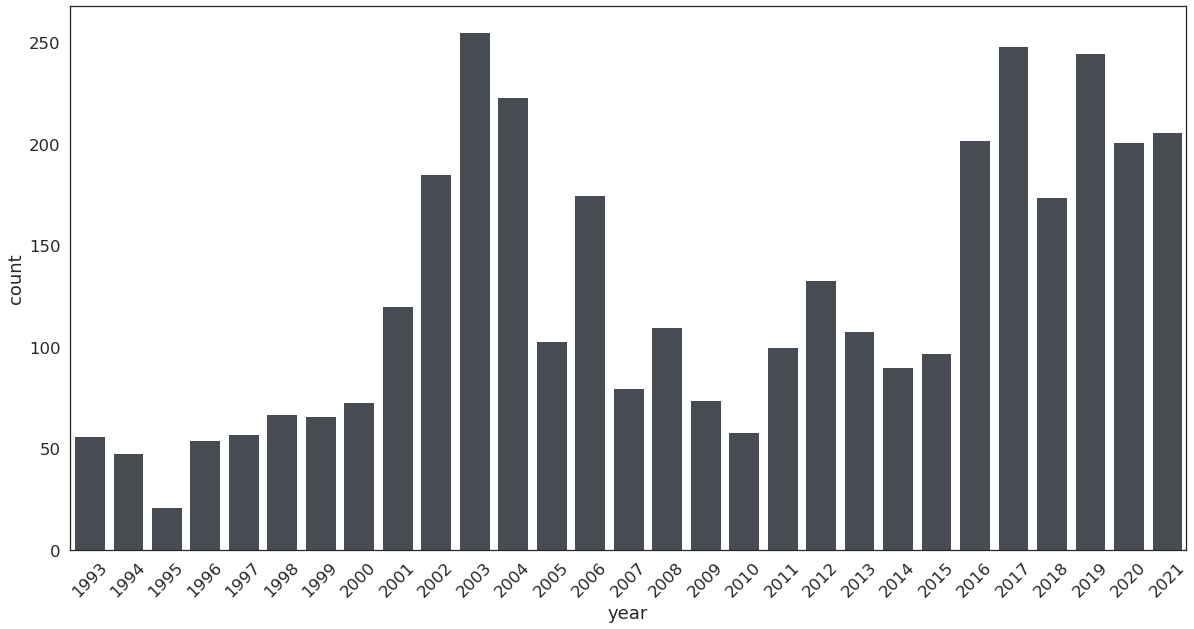

In [328]:
sns.set_theme(style = "white", font_scale = 1.5)
fig, ax = plt.subplots(figsize = (20,10))


plt.xticks(rotation = 45)
sns.countplot(x = "year", data = df2[df2['year'] != 2022], color = "#444c54", ax = ax)
plt.show()

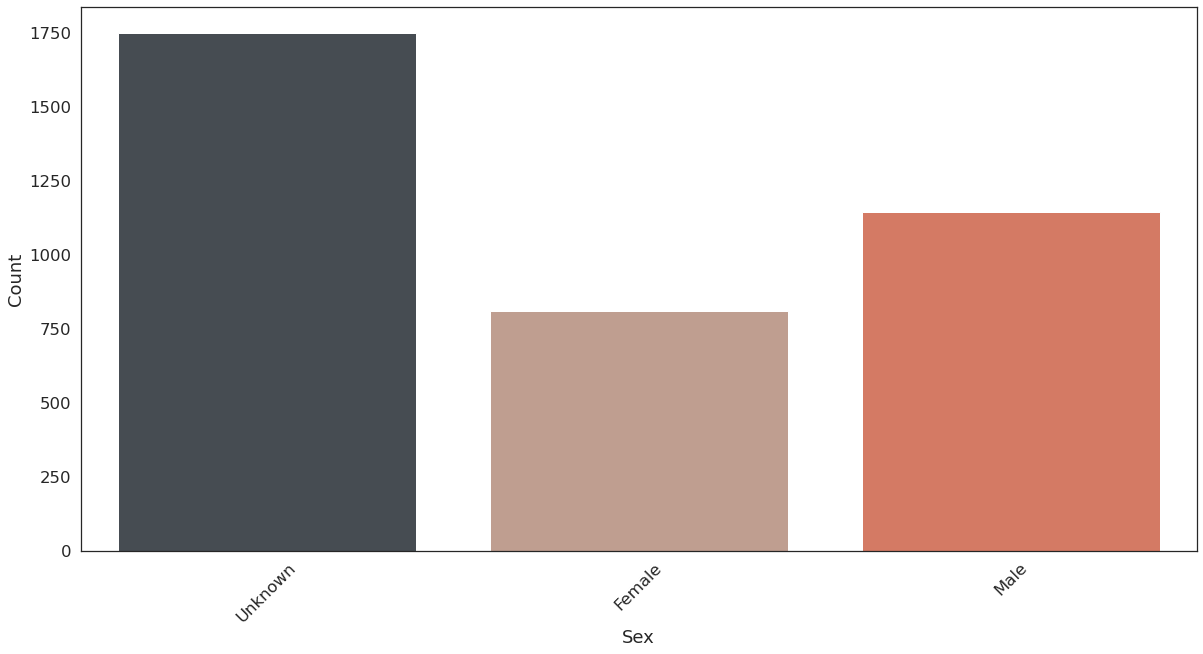

In [250]:
sns.set_theme(style = "white", font_scale = 1.5)
fig, ax = plt.subplots(figsize = (20,10))


plt.xticks(rotation = 45)
sns.countplot(x = "sex", data = df2, palette = colours[:3], ax = ax)
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
plt.show()

In [251]:
df2['species'].unique()

array(['Common Dolphin', "Risso's Dolphin", 'Harbour Porpoise',
       'Baleen whale', 'Small, toothed cetacean', 'Large cetacean',
       'Pilot Whale', 'Dolphin species', 'Small cetacean', 'Cetacean',
       'Striped Dolphin', 'Atlantic White-sided Dolphin',
       'Common Porpoise', 'Minke Whale', 'Bottlenose Dolphin',
       'White-beaked Dolphin', 'Whale species', 'Sperm Whale',
       'Sowerbys Beaked Whale', "Cuvier's Beaked Whale", 'Fin Whale',
       'Humpback Whale', 'Dwarf Sperm Whale', "Blainville's Beaked Whale",
       'Common dolphin', 'Dolphin Species'], dtype=object)

In [252]:
df2['species'] = df['species'].replace(
    to_replace=[
        'Common dolphin',
        'Dolphin species',
        'Small, toothed cetacean',
        'Small cetacean',
        'Cetacean',
        'Large cetacean',
    ],
    value=[
        'Common Dolphin',
        'Dolphin Species',
        'Cetacean',
        'Cetacean',
        'Cetacean',
        'Cetacean',
    ])
df2['species'].unique()

array(['Common Dolphin', "Risso's Dolphin", 'Harbour Porpoise',
       'Baleen whale', 'Cetacean', 'Pilot Whale', 'Dolphin Species',
       'Striped Dolphin', 'Atlantic White-sided Dolphin',
       'Common Porpoise', 'Minke Whale', 'Bottlenose Dolphin',
       'White-beaked Dolphin', 'Whale species', 'Sperm Whale',
       'Sowerbys Beaked Whale', "Cuvier's Beaked Whale", 'Fin Whale',
       'Humpback Whale', 'Dwarf Sperm Whale', "Blainville's Beaked Whale"],
      dtype=object)

In [283]:
df_species = df2.groupby('species')['species'].count()
df5 = pd.DataFrame(df_species)
df5['species2'] = df5.index
df5 = df5.reset_index(drop = True)
df5 = df5[df5['species']>10]
df5
df_species = df5.sort_values(by = 'species', ascending = False)
df_species

,species,species2
5,1810,Common Dolphin
11,976,Harbour Porpoise
8,438,Dolphin Species
4,208,Cetacean
18,74,Striped Dolphin
14,68,Pilot Whale
15,33,Risso's Dolphin
3,23,Bottlenose Dolphin
13,23,Minke Whale
19,14,Whale species


In [278]:
len(df_species.values)

10

In [311]:
df_species['cumsum'] = df_species['species'].cumsum()
df_species['perc'] = df_species['species'].apply(lambda x: x/df_species['species'].sum())

In [325]:
df_species['perc'] = df_species['perc'].cumsum()

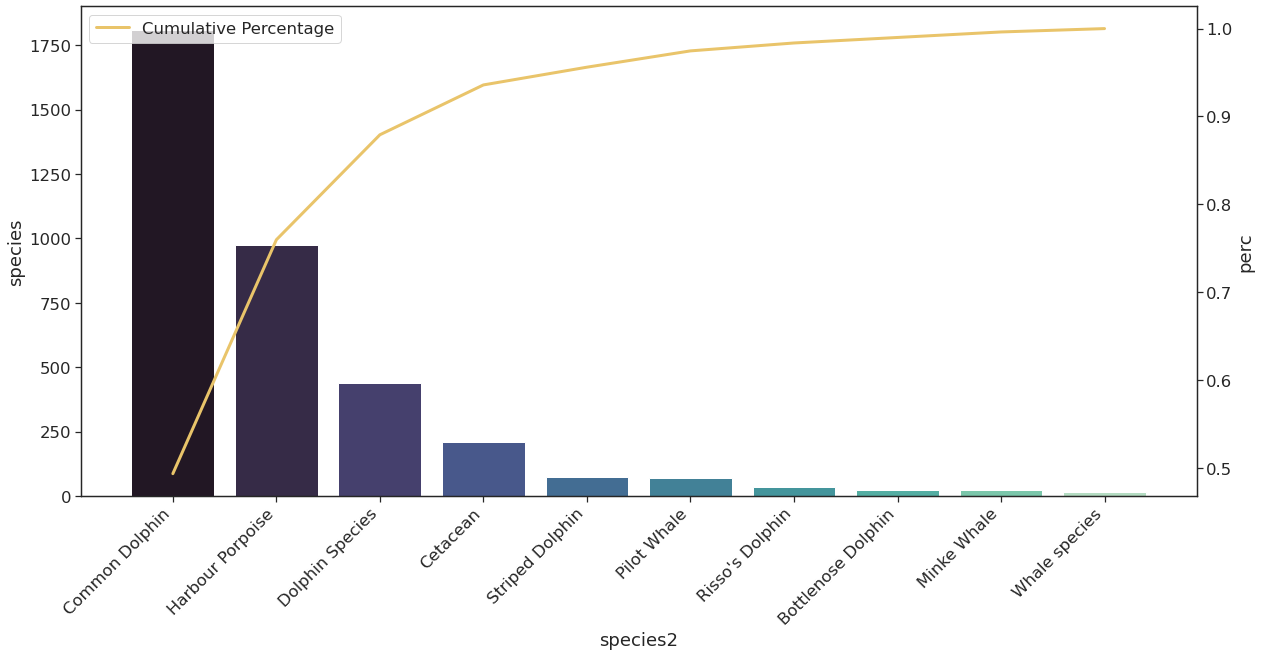

In [327]:
sns.set_theme(style = "ticks", font_scale = 1.5)
fig, ax1 = plt.subplots(figsize = (20,10))


fig.autofmt_xdate(rotation=45)


sns.barplot(
    x = 'species2', 
    y = 'species',
    palette = "mako",
    ax = ax1,
    data = df_species)
ax2 = plt.twinx()
sns.lineplot(
    x = 'species2',
    y = 'perc',
    data = df_species,
    color = colours[4],
    linewidth = 3,
    dashes = True)

ax.set_xlabel('Species')
ax.set_ylabel('Count')
plt.legend(labels= ["Cumulative Percentage"])
plt.show()

In [82]:
df2.columns

Index(['species', 'year', 'id_certainty', 'sex', 'location', 'cause_of_death',
       'cod_cat', 'bycatch_ev', 'beep_conc'],
      dtype='object')

In [83]:
df2['year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [84]:
df2.groupby('beep_conc')['beep_conc'].count()

beep_conc
Bycatch                                                   333
Bycatch - with evidence of BND trauma                       1
Entanglement                                                2
Inconclusive                                              661
Inconclusive - features of both bycatch and BND attack      1
Inconclusive - possible trauma                              1
Inconclusive, possible old age                              1
Inconclusive/Insufficient data                              2
Insufficiant data                                          36
Insufficient Data                                           1
Insufficient data                                         310
Live stranding                                              3
No Data                                                   185
No data                                                    53
No features                                               306
No features - possible starvation                           

In [85]:
df_beep = df2[~df2['beep_conc'].isnull()].copy()
# df_beep = df_beep[df_beep['year'] > 2012]
df_beep

,species,year,id_certainty,sex,location,cause_of_death,cod_cat,bycatch_ev,beep_conc
35,Harbour Porpoise,1993,Definite,Male,Newlyn,bycatch (known),Bycatch (known),"Yes; Landed at Newlyn, where it was taken from...",Bycatch
75,Cetacean,1994,NaN,Unknown,Downderry,bycatch (known),Bycatch (known),Entangled in net\nEntanglement case (2014),Bycatch
126,Dolphin Species,1996,NaN,Unknown,"Below Pendower beach House Hotel, Gerrans Bay",NaN,NaN,Flippers and tail cut off\nEntanglement case (...,Bycatch
129,Common Dolphin,1996,Definite,Male,"Parn Voose Cove, Lizard",NaN,NaN,Signs of monofilament net entanglement\nEntang...,Bycatch
137,Common Dolphin,1996,Definite,Unknown,"Trefusis Point, by granite 'obelisk'",NaN,NaN,Lower beak damaged and skin with criss-cross m...,Bycatch
...,...,...,...,...,...,...,...,...,...
3679,Striped Dolphin,2022,Definite,Male,"Bar Point, St Mary's, Isles of Scilly",NaN,NaN,NaN,No Data
3680,Common Dolphin,2022,Definite,Male,"Carne Beach, The Roseland",NaN,NaN,Flukes amputated,Bycatch
3692,Dolphin Species,2022,Definite,Unknown,"Porthleven Harbour, At Sea",NaN,NaN,NaN,Insufficient data
3698,Common Dolphin,2022,Definite,Female,Portreath Beach,NaN,NaN,Green rope attached to tailstock in photos fro...,Bycatch


In [86]:
df_beep['beep_conc'] = df_beep['beep_conc'].replace(
    to_replace=[
        'No data',
        'No Data',
        'no data',
        "Insufficiant data",
        "Insufficient Data",           
        "Insufficient data",
        'Insufficiant data',
        
    ],
    value= 'Inconclusive or Insufficent Data'
    )

In [87]:
df_beep['beep_conc'] = df_beep['beep_conc'].replace(
    to_replace=[
        "Inconclusive",
        'Inconclusive - features of both bycatch and BND attack',
        'Inconclusive - possible trauma',
        'Inconclusive, possible old age',
        'Inconclusive/Insufficient data', 
    ],
    value= 'Inconclusive or Insufficent Data'
    )

In [88]:
df_beep['beep_conc'] = df_beep['beep_conc'].replace(
    to_replace=[
        'No features', 
        'No features - possible starvation'
    ],
    value= 'No features'
    )

In [89]:
df_beep['beep_conc'] = df_beep['beep_conc'].replace(
    to_replace=[
        'Possible BND attack',
        'Possible Trauma - Boat Strike', 
        'Possible bycatch',
        'Possible bycatch/Entanglement',
        'Possible bycatch/entanglement',
        'Possible bycatch/trauma', 
    ],
    value= 'Possible bycatch'
    )

In [90]:
df_beep['beep_conc'] = df_beep['beep_conc'].replace(
    to_replace=[
        'Trauma',
        'Trauma - BND Attack',
        'Trauma - BND Attack - probable',
        'Trauma - Boat Strike',
        'Trauma - possible boat strike?'
    ],
    value= 'Trauma'
    )

In [91]:
df_beep['beep_conc'] = df_beep['beep_conc'].replace(
    to_replace=[
        'Unable to assess', 
        'Unknown'
    ],
    value= 'Unable to assess'
    )

In [92]:
df_beep['beep_conc'] = df_beep['beep_conc'].replace(
    to_replace=[
        'Probable Bycatch', 
        'Probable bycatch'
    ],
    value= 'Probable Bycatch'
    )

In [93]:
df_beep['beep_conc'] = df_beep['beep_conc'].replace(
    to_replace=[
        'Probable Bycatch', 
        'Probable bycatch'
    ],
    value= 'Probable Bycatch'
    )

In [94]:
df_beep['beep_conc'] = df_beep['beep_conc'].replace(
    to_replace=[
        'Bycatch', 
        'Bycatch - with evidence of BND trauma',
        'Entanglement'
    ],
    value= 'Bycatch'
    )

In [95]:
df_beep = df_beep.groupby('beep_conc')['beep_conc'].count()

In [96]:
df_beep = df_beep[df_beep > 5].sort_values(ascending=False)

In [97]:
df_beep

beep_conc
Inconclusive or Insufficent Data    1252
Bycatch                              336
No features                          307
Possible bycatch                     142
Probable Bycatch                     114
Trauma                                61
Name: beep_conc, dtype: int64

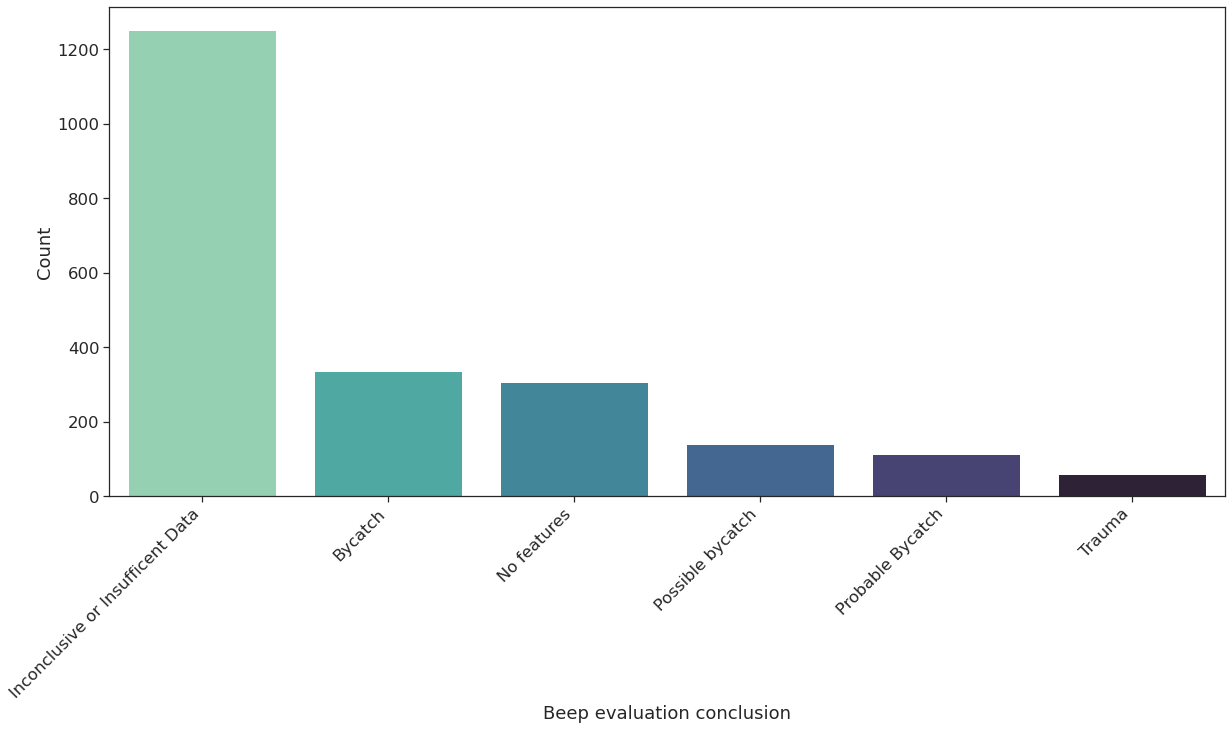

In [98]:
sns.set_theme(style = "ticks", font_scale = 1.5)
fig, ax = plt.subplots(figsize = (20,10))

fig.autofmt_xdate(rotation=45)
sns.barplot(
    x = df_beep.index, 
    y = df_beep.values,
    palette = "mako_r",
    ax = ax)
ax.set_xlabel('Beep evaluation conclusion')
ax.set_ylabel('Count')
plt.show()

In [99]:
df_beep

beep_conc
Inconclusive or Insufficent Data    1252
Bycatch                              336
No features                          307
Possible bycatch                     142
Probable Bycatch                     114
Trauma                                61
Name: beep_conc, dtype: int64

In [100]:
df2['beep_conc'].isnull().sum()

1486

/home/charlie/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


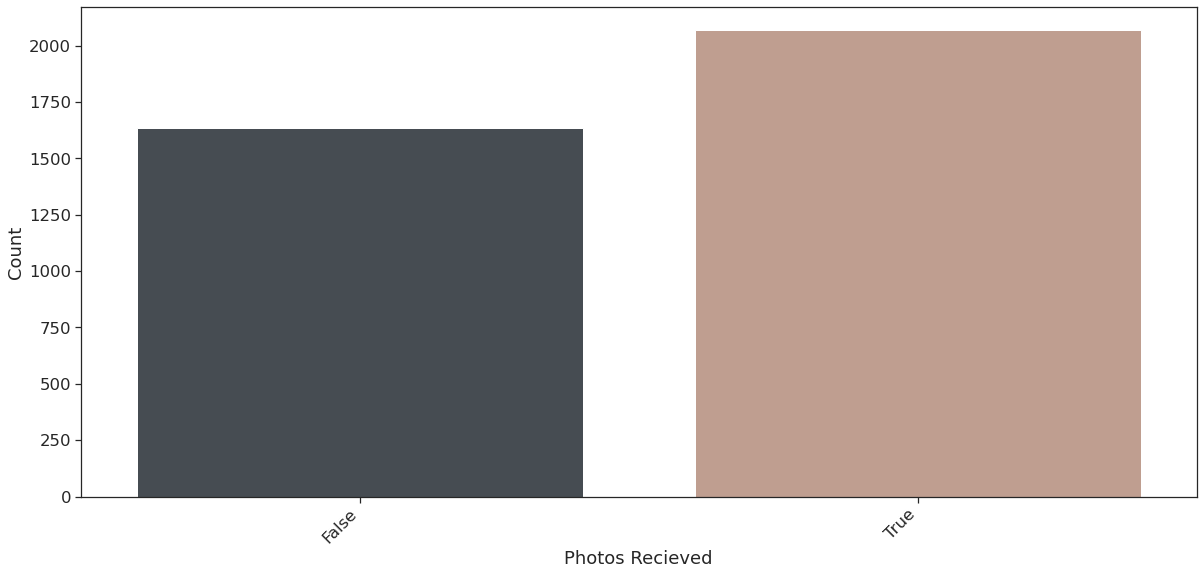

In [101]:
sns.set_theme(style = "ticks", font_scale = 1.5)
fig, ax = plt.subplots(figsize = (20,10))

fig.autofmt_xdate(rotation=45)
sns.countplot(df.photos_rec,
    palette = colours[:2],
    ax = ax)
ax.set_xlabel('Photos Recieved')
ax.set_ylabel('Count')
plt.show()

In [102]:
df2

,species,year,id_certainty,sex,location,cause_of_death,cod_cat,bycatch_ev,beep_conc
0,Common Dolphin,1993,Definite,Unknown,"West of Gillan, Helford River complex",NaN,NaN,NaN,NaN
1,Common Dolphin,1993,Definite,Female,"Tresco, Isles of Scilly",NaN,NaN,Lower left jaw broken,NaN
2,Risso's Dolphin,1993,Probable,Unknown,Lantic Bay,NaN,NaN,NaN,NaN
3,Common Dolphin,1993,Definite,Male,"Polstreath Cove, Mevagissey.","physical trauma, bycatch",Bycatch,Broken beak.\nEntanglement case (2014),NaN
4,Harbour Porpoise,1993,Definite,Male,"Carne beach, near Veryan","physical trauma, by-catch?",Not Established,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3699,Common Dolphin,2022,Probable,Male,"Mousehole Beach, Mousehole",NaN,NaN,NaN,Bycatch
3700,Dolphin Species,2022,Definite,Unknown,"Polurrian Cove, Mullion",NaN,NaN,NaN,NaN
3701,Common Dolphin,2022,Definite,Male,"Whipsiderry, Newquay",NaN,NaN,NaN,NaN
3702,Common Dolphin,2022,Definite,Female,"Rinsey Beach, The Lizard",NaN,NaN,NaN,NaN


In [219]:
df3 = df.drop(columns = [
    'id',
    'length', 
    'length_text', 
    'grid_ref', 
    'pmno', 
    'photos_rec', 
    'number', 
    'latin_name', 
    "notes", 
    "condition"
])

In [220]:
df3['count'] = 1

In [221]:
df3['date'] = pd.to_datetime(df3['date'])

In [222]:
df3['month'] = df3.date.dt.month

In [223]:
df_month = df3.groupby(['month', 'year']).count().reset_index()

In [224]:
df_mean = df_month.groupby(['month'])[['month', 'count']].mean()
df_mean.sort_index(inplace = True)

In [225]:
df_mean['month'] = df_mean['month'].replace(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    ["January", 
     "February",
    "March", 
     "April",
     "May", 
     "June",
     "July", 
     "August",
     "September", 
     "October",
     "November", 
     "December",
    ])

In [226]:
df_mean

,month,count
month,,
1,January,19.103448
2,February,14.266667
3,March,16.233333
4,April,10.633333
5,May,6.714286
6,June,4.866667
7,July,7.178571
8,August,7.758621
9,September,9.758621


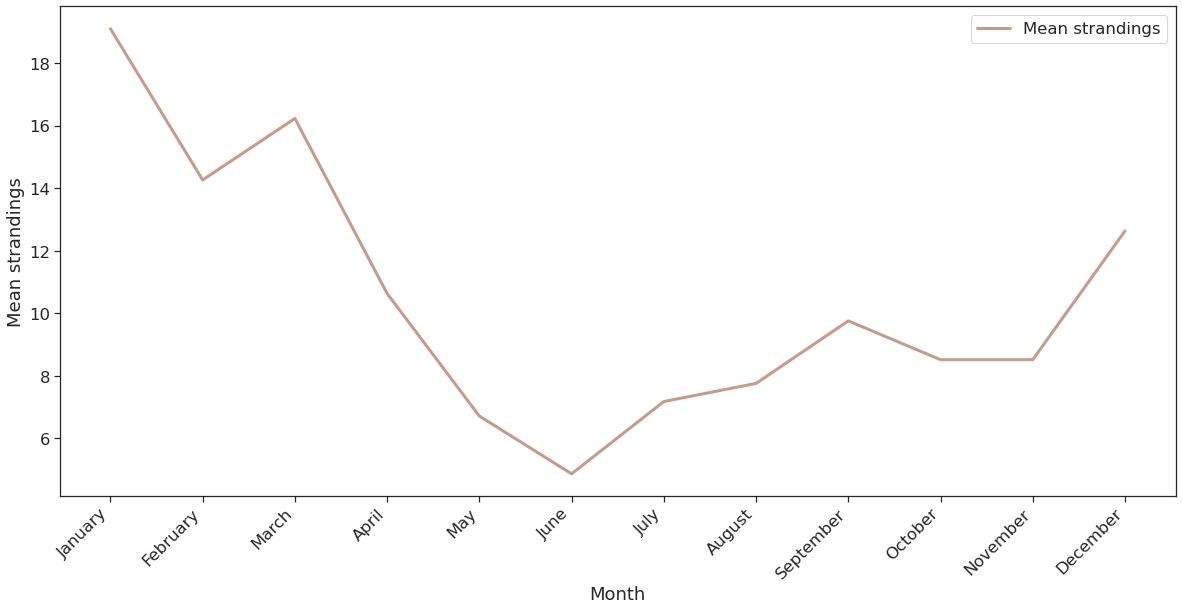

In [233]:
sns.set_theme(style = "ticks", font_scale = 1.5)
fig, ax = plt.subplots(figsize = (20,10))

fig.autofmt_xdate(rotation=45)
sns.lineplot(
    x = "month",
    y= "count",
    color = colours[1],
    ax = ax,
    data = df_mean,
    linewidth = 3)
ax.set_xlabel('Month')
ax.set_ylabel('Mean strandings')


plt.legend(labels= ["Mean strandings"])
plt.show()

In [427]:
df_fe_2019 = pd.read_csv(os.path.join(RAW_DATA_DIR, "fishing_effort.csv"))
df_fe_2018 = pd.read_csv(os.path.join(RAW_DATA_DIR, "fishing_effort_2018.csv"))

In [428]:
df_fe_2019 = df_fe_2019[['Month', "Landed Weight (tonnes)"]]
df_fe_2018 = df_fe_2018[['Month', "Landed Weight (tonnes)"]]

In [390]:
df_fe = df_fe_2019.join(df_fe_2018, on = 'Month', how = 'left', lsuffix="_2019", rsuffix="_2018")
df_fe['landed_weight'] = df_fe['Landed Weight (tonnes)_2019'] + df_fe['Landed Weight (tonnes)_2019']
df_fe = df_fe[['Month']]

,Month_2019,Landed Weight (tonnes)_2019,Month_2018,Landed Weight (tonnes)_2018,landed_weight
0,1,0.0422,1,0.0074,0.0844
1,1,0.1200,1,0.0074,0.2400
2,1,11.0940,1,0.0074,22.1880
3,1,1.0021,1,0.0074,2.0042
4,1,0.0050,1,0.0074,0.0100
...,...,...,...,...,...
79673,12,0.0020,1,0.0466,0.0040
79674,12,0.0020,1,0.0466,0.0040
79675,12,0.0050,1,0.0466,0.0100
79676,12,0.0300,1,0.0466,0.0600


In [429]:
df_fe_2019 = df_fe_2019.groupby('Month', as_index = False).sum()
df_fe_2019
df_fe_2019['Month'] = df_fe_2019['Month'].replace(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    ["January", 
     "February",
    "March", 
     "April",
     "May", 
     "June",
     "July", 
     "August",
     "September", 
     "October",
     "November", 
     "December",
    ])

In [430]:
df_fe_2018 = df_fe_2018.groupby('Month', as_index = False).sum()
df_fe_2018
df_fe_2018['Month'] = df_fe_2018['Month'].replace(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    ["January", 
     "February",
    "March", 
     "April",
     "May", 
     "June",
     "July", 
     "August",
     "September", 
     "October",
     "November", 
     "December",
    ])

In [431]:
df_fe_2019
df_fe_2018

,Month,Landed Weight (tonnes)
0,January,92980.4162
1,February,55092.2133
2,March,77280.1284
3,April,35585.7614
4,May,29795.1494
5,June,32752.9494
6,July,49836.5415
7,August,68892.9713
8,September,57176.9398
9,October,86349.8366


In [435]:
df_fe = df_fe_2019.merge(df_fe_2018, left_on = 'Month', right_on='Month')

In [436]:
df_fe['avg_landed_weight'] = (df.iloc[:, 1] + df.iloc[:, 2])/2

In [437]:
df_fe

,Month,Landed Weight (tonnes)_x,Landed Weight (tonnes)_y,avg_landed_weight
0,January,81441.0238,92980.4162,87210.72000
1,February,41166.1571,55092.2133,48129.18520
2,March,74005.9627,77280.1284,75643.04555
3,April,39604.5019,35585.7614,37595.13165
4,May,27873.4015,29795.1494,28834.27545
5,June,28518.0371,32752.9494,30635.49325
6,July,35695.3232,49836.5415,42765.93235
7,August,52495.6333,68892.9713,60694.30230
8,September,66738.5866,57176.9398,61957.76320
9,October,83558.8266,86349.8366,84954.33160


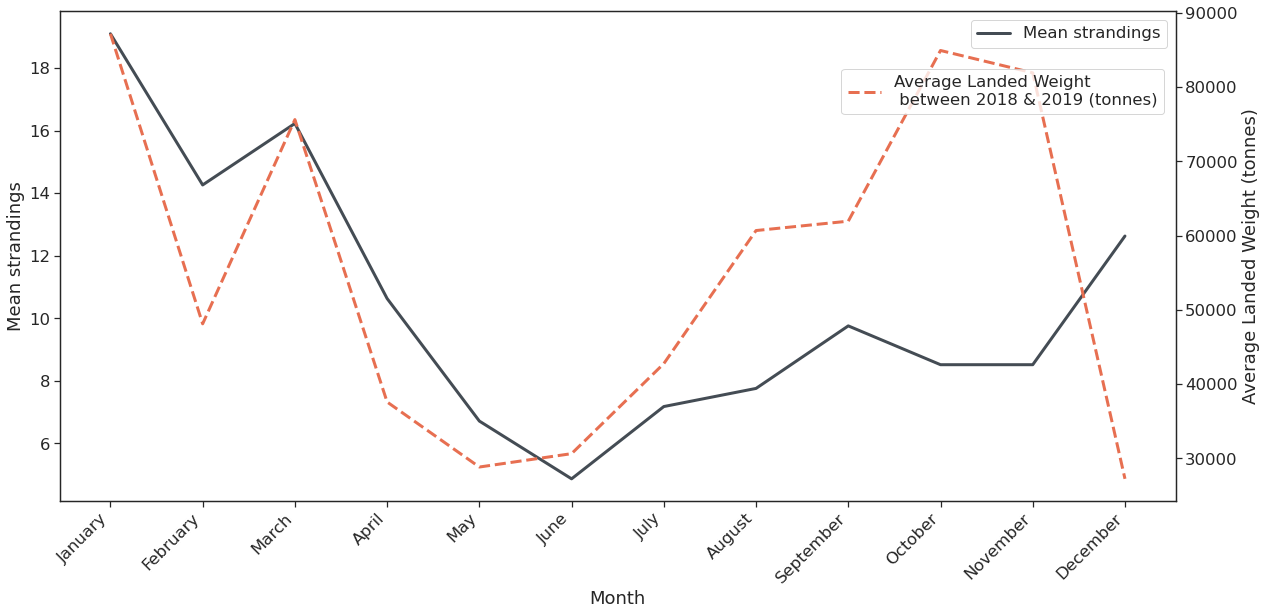

In [471]:
sns.set_theme(style = "ticks", font_scale = 1.5)
fig, ax = plt.subplots(figsize = (20,10))

fig.autofmt_xdate(rotation=45)
sns.lineplot(
    x = "month",
    y= "count",
    color = colours[0],
    ax = ax,
    data = df_mean,
    linewidth = 3)
ax.set_xlabel('Month')
ax.set_ylabel('Mean strandings')

ax2 = plt.twinx()
sns.lineplot(
    x = "Month",
    y= "avg_landed_weight",
    color = colours[2],
    ax = ax2,
    data = df_fe,
    linewidth = 3,
legend = True)
ax2.lines[0].set_linestyle('--')
ax.set_xlabel('Month')
ax.set_ylabel('Mean strandings')

ax2.set_ylabel('Average Landed Weight (tonnes)')

ax.legend(labels= ["Mean strandings"])
ax2.legend(labels = ["Average Landed Weight\n between 2018 & 2019 (tonnes)"])
sns.move_legend(ax2, "upper center", bbox_to_anchor = (0.845,0.9))

plt.show()